In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
df = pd.read_csv(r'../data/bitcoin_price_Training - Training.csv')
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [4]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [5]:
df_grp = df.groupby('Date', as_index=False).size()
df_grp

,Date,size
0,"Apr 01, 2014",1
1,"Apr 01, 2015",1
2,"Apr 01, 2016",1
3,"Apr 01, 2017",1
4,"Apr 02, 2014",1
...,...,...
1551,"Sep 29, 2016",1
1552,"Sep 30, 2013",1
1553,"Sep 30, 2014",1
1554,"Sep 30, 2015",1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [7]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


## 2 Data processing

In [9]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [10]:
df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [11]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.sort_index(ascending=False).reset_index()

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...,...
1551,4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


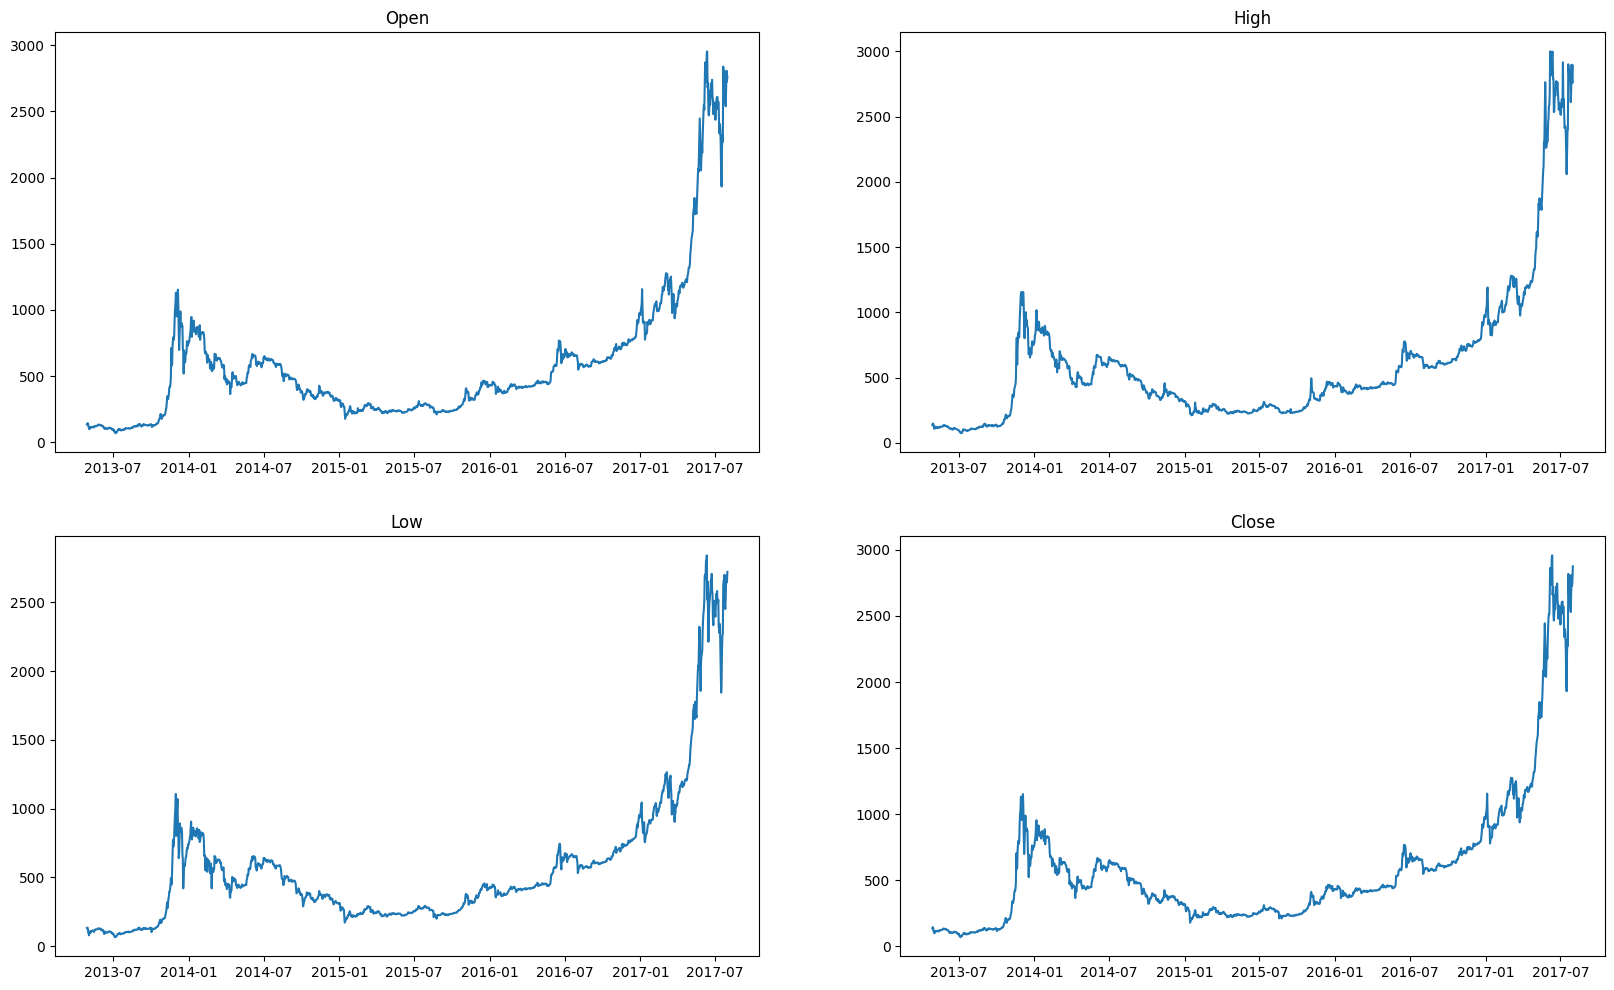

In [15]:
plt.figure(figsize=(20,12))
for index, col in enumerate(['Open','High','Low','Close'], 1):
    plt.subplot(2,2,index)
    plt.plot(df['Date'], df[col])
    plt.title(col)

# 23 - Analysing Bitcoin prices using Candlestick chart

In [16]:
# segment a small data
df_sample = df[0:50]

In [17]:
# Initialize
init_notebook_mode(connected=True)

In [18]:
trace = go.Candlestick(x=df_sample['Date'],
                       high=df_sample['High'],
                       open=df_sample['Open'],
                       close=df_sample['Close'],
                       low=df_sample['Low'])

In [19]:
candle_data = [trace]
layout = {
    'title': 'Bitcoin Historical Price',
    'xaxis': {'title':'Date'}
}

In [20]:
fig_1 = go.Figure(data=candle_data, layout = layout)

In [21]:

fig_1.update_layout(xaxis_rangeslider_visible=False)
fig_1.show()

# 24 - Analysing closing price indepth

In [22]:
df.reset_index(inplace=True)

In [23]:
df.dtypes

index                  int64
Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap            object
dtype: object

In [24]:
df['Date'] = pd.to_datetime(df['Date'])

In [25]:
df.sort_values('Date', inplace=True)

In [26]:
df.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

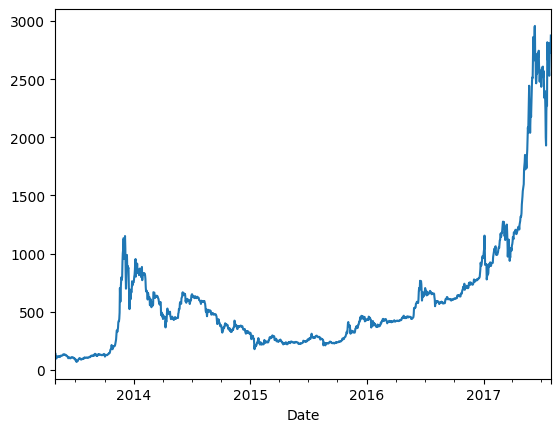

In [28]:
df['Close'].plot()

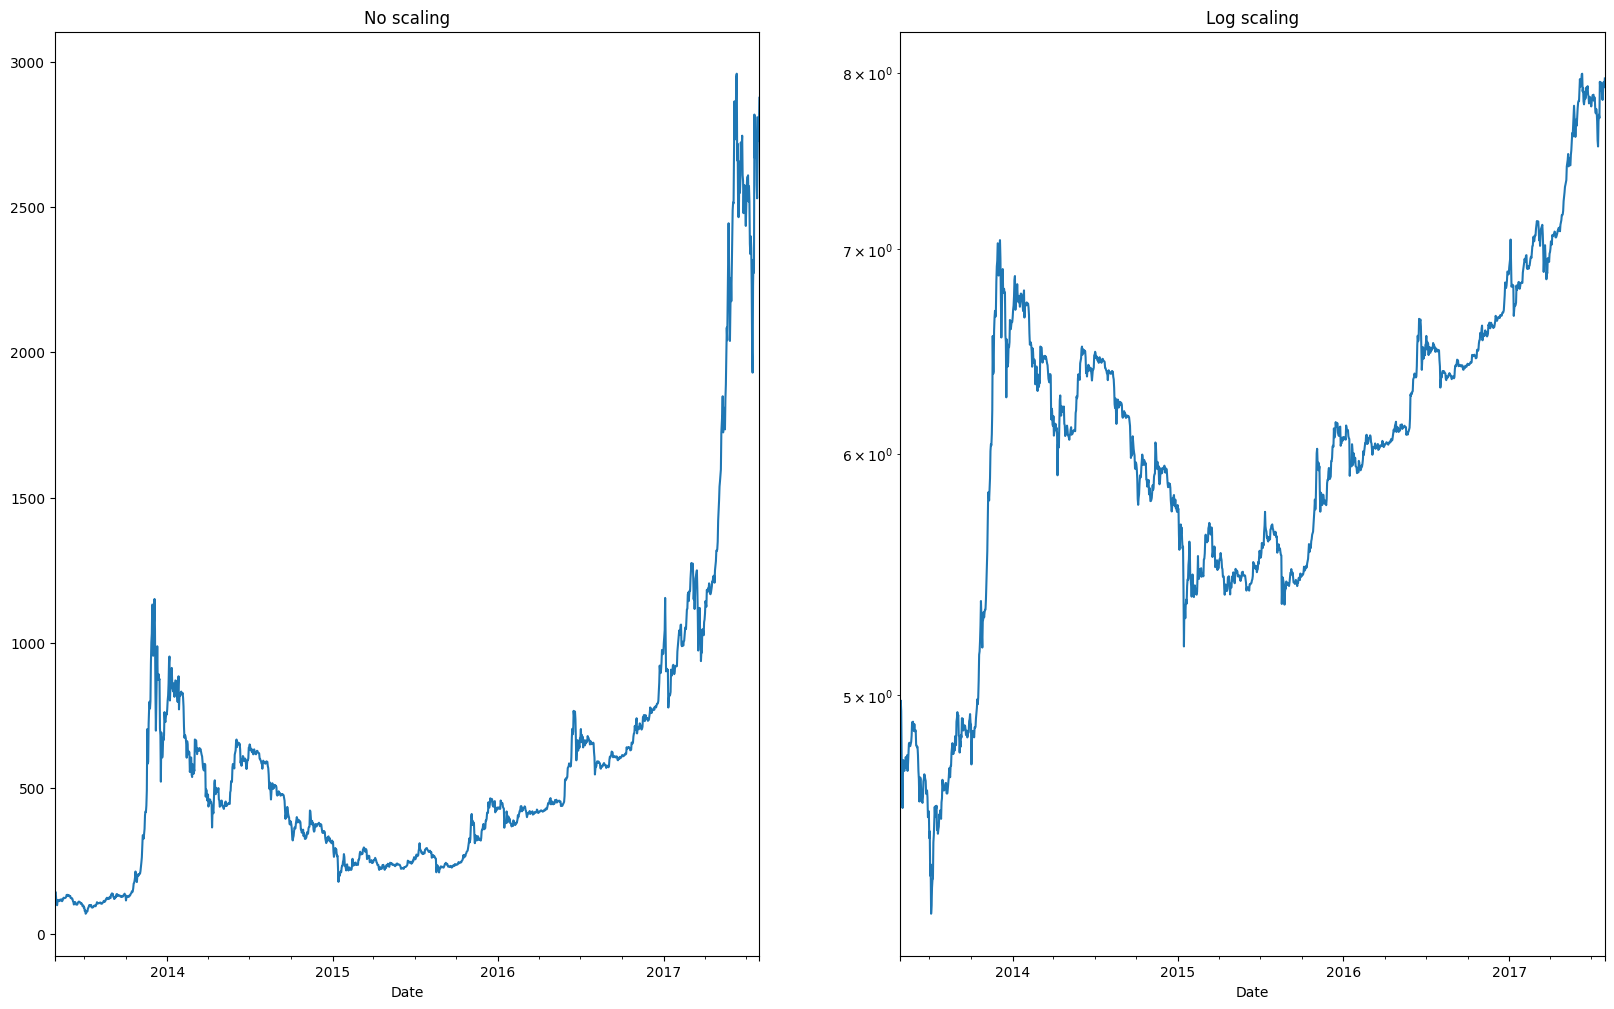

In [29]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
df['Close'].plot()
plt.title('No scaling')

plt.subplot(1,2,2)
np.log1p(df['Close']).plot()
plt.title('Log scaling')
plt.yscale('log')

# 25 - Perform Analysis on closing Price on Yearly Quarterly monthly basis

In [30]:
df.head(3)

,index,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,
2013-04-28,1555,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,1554,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,1553,144.00,146.93,134.05,139.00,-,"1,597,780,000"


In [31]:
df['Close'].resample('YE').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: YE-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

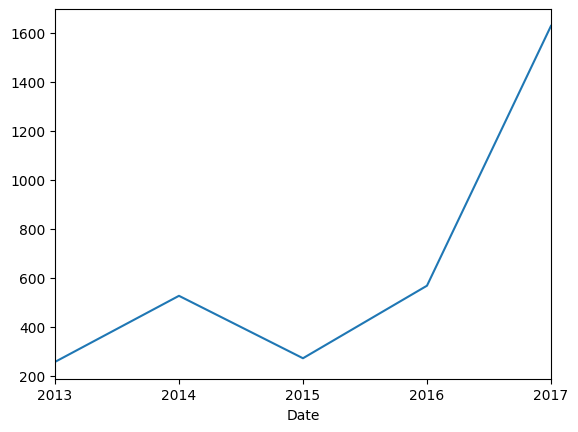

In [32]:
df['Close'].resample('YE').mean().plot()

<Axes: xlabel='Date'>

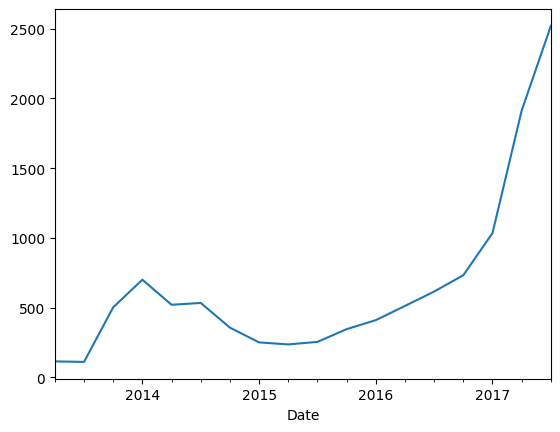

In [33]:
df['Close'].resample('QE').mean().plot()

<Axes: xlabel='Date'>

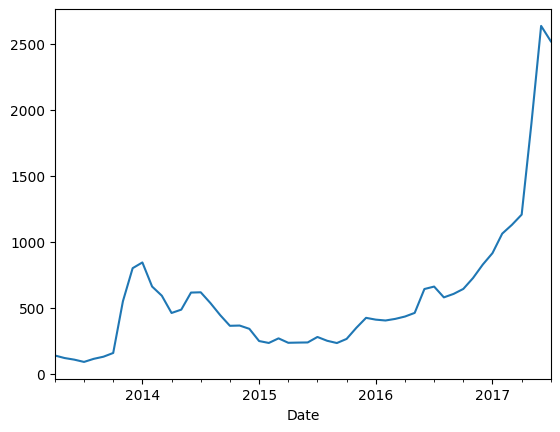

In [34]:
df['Close'].resample('ME').mean().plot()

# 26 - Analysing Daily change in Closing price of stocks

In [35]:
df.head(2)

,index,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,
2013-04-28,1555,135.30,135.98,132.1,134.21,-,"1,500,520,000"
2013-04-29,1554,134.44,147.49,134.0,144.54,-,"1,491,160,000"


In [36]:
df['Close'].pct_change()

Date
2013-04-28         NaN
2013-04-29    0.076969
2013-04-30   -0.038328
2013-05-01   -0.158345
2013-05-02   -0.100692
                ...   
2017-07-27    0.056269
2017-07-28    0.051363
2017-07-29   -0.029391
2017-07-30    0.011271
2017-07-31    0.042855
Name: Close, Length: 1556, dtype: float64

In [37]:
df['Close'].pct_change()*100

Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: Close, Length: 1556, dtype: float64

In [38]:
df['Close_price_pct_change'] = df['Close'].pct_change()*100

<Axes: xlabel='Date'>

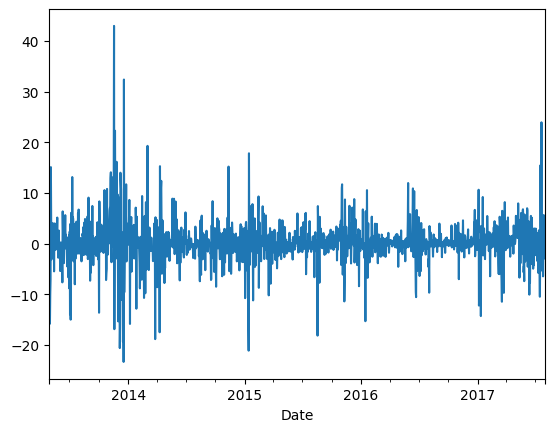

In [39]:
df['Close_price_pct_change'].plot()

In [40]:
type(df['Close_price_pct_change'])

pandas.core.series.Series